# LC-MS Decoding Demo

This demo demonstrates how to use the `LCMSMeasMan` and `LCMSUVMeasMan` measurement managers to process and analyze LC-MS data (with and without UV-Vis detection) from `.mzML` files:

- Load and process LC-MS data from mzML files
- Perform peak picking with strict boundary detection
- Extract MS spectra at peak apexes
- Visualize TIC with detected peaks, boundaries, and local maxima
- Plot MS spectra at specific retention times
- Access peak information programmatically

This notebook requires the `ppenv` conda environment to be activated. 

## Decoding LC-MS Data Without UV-Vis Files

If an LC-MS machine does not have UV-Vis capabilities, instantiate a `LCMSMeasMan` measurement manager to decode the associated `.mzML` file and perform MS/RT analysis on.

### Step 1: Load LC-MS Data

Load D4.mzML file and initialize the `LCMSMeasMan`. The class automatically:
- Loads the mzML file
- Calculates the Total Ion Chromatogram (TIC)
- Applies baseline correction
- Detects available MS polarities (positive and negative)
- Auto-selects polarity (defaults to positive if available, otherwise negative)
- Performs peak picking with strict boundary detection
- Extracts MS spectra for each detected peak

A note that you can explicitly specify the polarity of the MS process (1 for positive, -1 for negative) or let it auto-detect.


In [1]:
import sys
from pathlib import Path

project_root = Path('.').resolve().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

from decoding.LCMS_meas_man import LCMSMeasMan

mzml_path = "../data/D4.mzML"

meas_man = LCMSMeasMan(mzml_path, polarity=None)

print("\nCreated LCMSMeasMan Object From D4.mzML!")

print(meas_man)



Determination of memory status is not supported on this 
 platform, measuring for memoryleaks will never fail


Loading ../data/D4.mzML...
Auto-selected: MS+ (positive mode) - 961 points found
MS+ only data: 962 points
RT range: 0.12 - 120.05 min
Found 4 peak apexes
Peak 1: RT=29.104 min, Boundaries: 28.854 - 29.728 min, Local maxima: 0
Peak 2: RT=35.475 min, Boundaries: 32.601 - 38.598 min, Local maxima: 4
Peak 3: RT=74.951 min, Boundaries: 71.828 - 75.700 min, Local maxima: 2
Peak 4: RT=79.198 min, Boundaries: 76.075 - 79.198 min, Local maxima: 2

Created LCMSMeasMan Object From D4.mzML!
LCMSMeasMan(file_path='../data/D4.mzML', num_peaks=4)


### Step 2: Inspect Detected Peaks

Get information about all detected peaks, including apex retention times, boundaries, and local maxima.

In [2]:
print(f"Total peaks detected: {len(meas_man)}")
print(f"Polarity used: {meas_man.polarity_label}")
print(f"\nPeak apex retention times (min):")
apex_times = meas_man.get_apex_times()
for i, rt in enumerate(apex_times, 1):
    print(f"  Peak {i}: {rt:.3f} min")

# obtain comprehensive peak summary
all_peaks = meas_man.get_all_peaks()
print(f"\nDetailed peak information:")
for i, peak in enumerate(all_peaks, 1):
    print(f"\nPeak {i}:")
    print(f"  Apex RT: {peak['apex_rt']:.3f} min")
    print(f"  Apex Intensity: {peak['apex_intensity']:.2e}")
    print(f"  Boundaries: {peak['start_rt']:.3f} - {peak['end_rt']:.3f} min")
    print(f"  Peak Width: {peak['end_rt'] - peak['start_rt']:.3f} min")
    print(f"  Local Maxima: {len(peak['local_maxima_rt'])}")
    print(f"  MS Spectrum Points: {len(peak['ms_spectrum'])}")

Total peaks detected: 4
Polarity used: MS+

Peak apex retention times (min):
  Peak 1: 29.104 min
  Peak 2: 35.475 min
  Peak 3: 74.951 min
  Peak 4: 79.198 min

Detailed peak information:

Peak 1:
  Apex RT: 29.104 min
  Apex Intensity: 9.54e+06
  Boundaries: 28.854 - 29.728 min
  Peak Width: 0.874 min
  Local Maxima: 0
  MS Spectrum Points: 129

Peak 2:
  Apex RT: 35.475 min
  Apex Intensity: 3.29e+06
  Boundaries: 32.601 - 38.598 min
  Peak Width: 5.997 min
  Local Maxima: 4
  MS Spectrum Points: 118

Peak 3:
  Apex RT: 74.951 min
  Apex Intensity: 5.50e+06
  Boundaries: 71.828 - 75.700 min
  Peak Width: 3.872 min
  Local Maxima: 2
  MS Spectrum Points: 203

Peak 4:
  Apex RT: 79.198 min
  Apex Intensity: 3.51e+06
  Boundaries: 76.075 - 79.198 min
  Peak Width: 3.123 min
  Local Maxima: 2
  MS Spectrum Points: 212


### Step 3: Access Individual Peak Information

Retrieve detailed information for a specific peak by its apex retention time.
Can return information on local maxima as well as the mass spectra associated with the peak apex.


In [3]:
# basic peak information
if len(apex_times) > 0:
    first_peak_rt = apex_times[0]
    peak_info = meas_man.get_peak(first_peak_rt)
    
    print(f"Peak at RT = {first_peak_rt:.3f} min:")
    print(f"  Intensity: {peak_info['apex_intensity']:.2e}")
    print(f"  Boundaries: {peak_info['start_rt']:.3f} - {peak_info['end_rt']:.3f} min")
    if peak_info['local_maxima_rt']:
        print(f"  Local Maxima RT: {[f'{rt:.3f}' for rt in peak_info['local_maxima_rt']]}")

# ms spectrum data at apex
if len(apex_times) > 0:
    first_peak_rt = apex_times[0]
    ms_spectrum = meas_man.get_ms_spectrum(first_peak_rt)
    
    if ms_spectrum:
        print(f"\nMS Spectrum for peak at RT = {first_peak_rt:.3f} min:")
        print(f"  Total m/z points: {len(ms_spectrum)}")
        print(f"\n  Top 10 most intense peaks:")
        sorted_spectrum = sorted(ms_spectrum, key=lambda x: x[1], reverse=True)
        for mz, intensity in sorted_spectrum[:10]:
            print(f"    m/z = {mz:.4f}, Intensity = {intensity:.2e}")
    else:
        print(f"No MS spectrum found for peak at RT = {first_peak_rt:.3f} min")


Peak at RT = 29.104 min:
  Intensity: 9.54e+06
  Boundaries: 28.854 - 29.728 min

MS Spectrum for peak at RT = 29.104 min:
  Total m/z points: 129

  Top 10 most intense peaks:
    m/z = 195.2822, Intensity = 4.69e+06
    m/z = 153.1954, Intensity = 8.48e+05
    m/z = 171.1917, Intensity = 6.68e+05
    m/z = 196.2033, Intensity = 5.66e+05
    m/z = 159.1114, Intensity = 2.31e+05
    m/z = 194.0777, Intensity = 1.37e+05
    m/z = 172.1836, Intensity = 1.35e+05
    m/z = 154.1873, Intensity = 1.18e+05
    m/z = 194.4674, Intensity = 1.12e+05
    m/z = 187.0629, Intensity = 1.05e+05


### Step 4: Visualize TIC with Peaks

Plot the Total Ion Chromatogram with detected peaks, boundaries, and local maxima annotated.


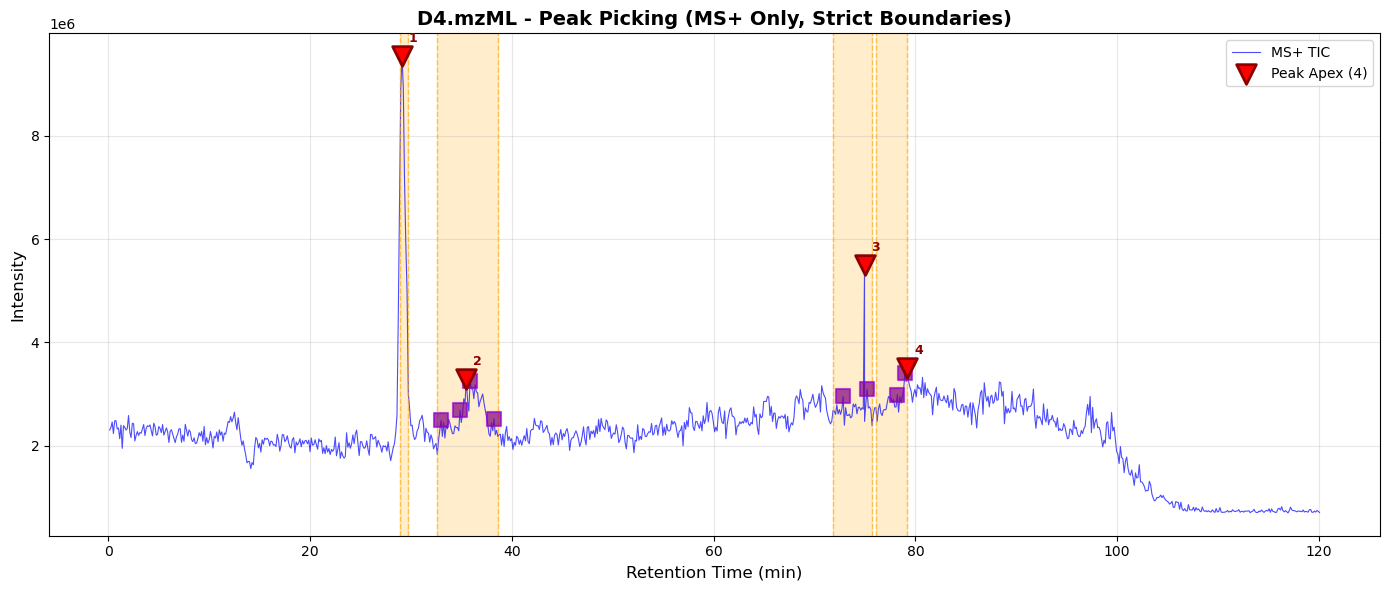

In [4]:
meas_man.plot_tic_with_peaks(show=True)

### Step 5: Plot MS Spectrum at a Target RT

Visualize the MS spectrum at a specific retention time. This is useful for identifying compounds at specific elution times.

The plot can also be limited with the `top_n` parameter to show only the top N most intense peaks for clearer visualization.

Plotting MS spectrum at RT = 12.000 min


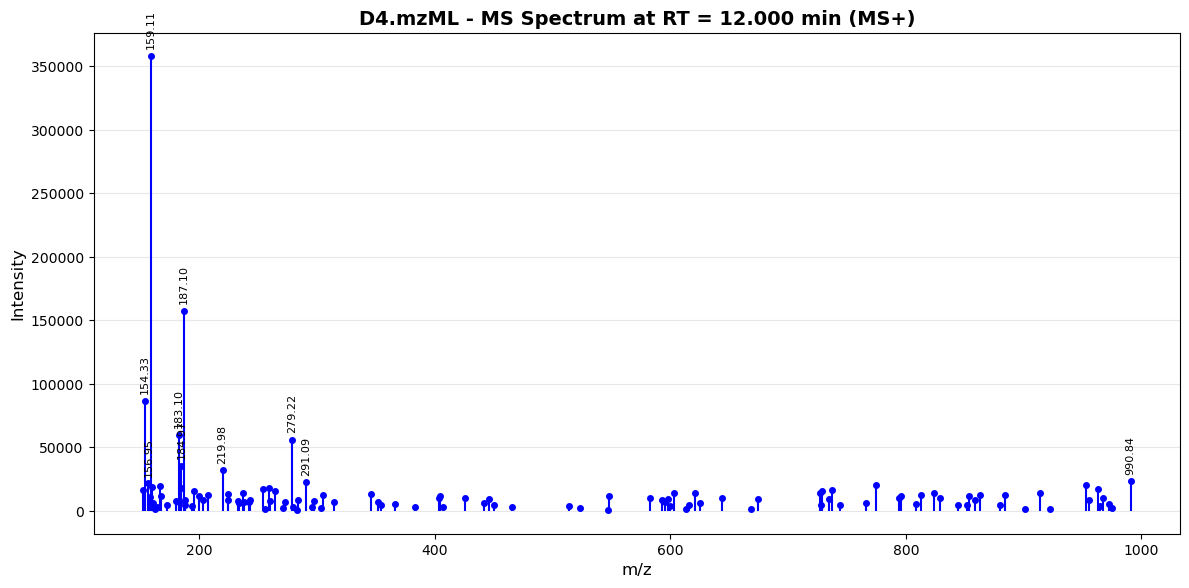

In [5]:
# full ms spectrum
if len(apex_times) > 0:
    target_rt = 12
    print(f"Plotting MS spectrum at RT = {target_rt:.3f} min")
    meas_man.plot_ms_spectrum(target_rt, tolerance=6.0, show=True)
else:
    print("No peaks found to plot spectrum")

Plotting top 20 MS peaks at RT = 29.104 min


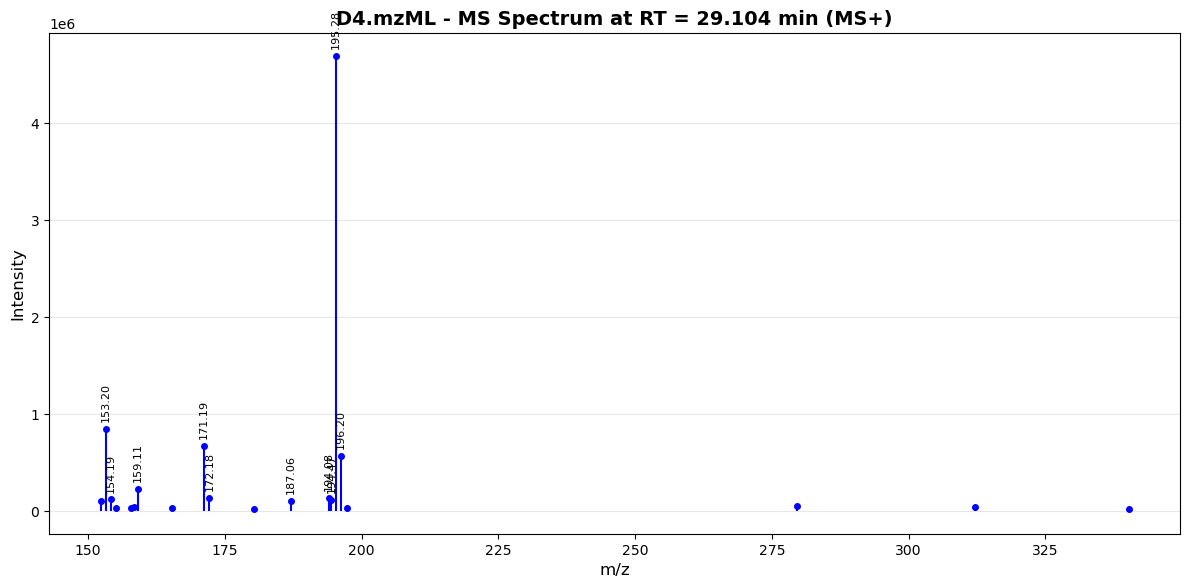

In [6]:
# partial ms spectrum
if len(apex_times) > 0:
    target_rt = apex_times[0]
    print(f"Plotting top 20 MS peaks at RT = {target_rt:.3f} min")
    meas_man.plot_ms_spectrum(target_rt, tolerance=20, top_n=20, show=True)

## Decoding LC-MS Data With UV-Vis Files

If an LC-MS machine does not have UV-Vis capabilities, instantiate a `LCMSUVMeasMan` measurement manager to decode the associated `.mzML` and `.csv`/`.txt`/`mocca_example` output files. This allows PeakProphet to easily perform MS/RT/Lambda Max analysis on each LC-MS peak.

### Step 1: Initialize LCMSUVMeasMan

Initialize `LCMSUVMeasMan` with both MS and UV-Vis data. Here we use mocca2 example_2 data for UV-Vis and E2.mzML for MS data.

The `LCMSUVMeasMan` class will:
- Load the mzML file for MS data
- Use mocca2 example data for UV-Vis
- Perform peak picking on UV-Vis data using mocca2's deconvolution
- Extract lambda max at each peak apex
- Extract MS spectra at each peak apex
- Store all peak information including boundaries and local maxima


In [7]:
from decoding.LCMSUV_meas_man import LCMSUVMeasMan
from mocca2 import example_data
from matplotlib import pyplot as plt
import pandas as pd

# loading mocca2 example data (example_2)
chromatogram = example_data.example_2()
print(f"Loaded mocca2 example_2 chromatogram")
print(f"Time range: {chromatogram.time[0]:.2f} - {chromatogram.time[-1]:.2f} min")
print(f"Wavelength range: {chromatogram.wavelength[0]:.0f} - {chromatogram.wavelength[-1]:.0f} nm")

chromatogram.correct_baseline()
print(f"\nApplied baseline correction to chromatogram")

mzml_path_uv = "../data/E2.mzML"

# initialize with mocca2 example_2 data for UV-Vis and E2.mzML for MS
lcmsuv_man = LCMSUVMeasMan(
    mzml_path=str(mzml_path_uv),
    use_example_data=True,
    ms_polarity=None 
)

print(f"\nInitialized LCMSUVMeasMan with mocca2 example_2 data for UV-Vis and E2.mzML for MS!")
print(lcmsuv_man)


Loaded mocca2 example_2 chromatogram
Time range: 0.00 - 3.75 min
Wavelength range: 190 - 400 nm

Applied baseline correction to chromatogram
Loading MS data from ../data/E2.mzML...
Loading ../data/E2.mzML...
Auto-selected: MS+ (positive mode) - 961 points found
MS+ only data: 962 points
RT range: 0.12 - 120.05 min
Skipping TIC peak picking (peaks will be provided from external source)
Using mocca2 example data for UV-Vis...
Peak 1: RT=0.050 min, Boundaries: 0.042 - 0.073 min, Lambda max: 220.8 nm, Local maxima: 0, Integral: 512.49
Peak 2: RT=0.246 min, Boundaries: 0.227 - 0.262 min, Lambda max: 217.7 nm, Local maxima: 0, Integral: 320.88
Peak 3: RT=1.459 min, Boundaries: 1.378 - 1.474 min, Lambda max: 307.3 nm, Local maxima: 0, Integral: 1091.40
Peak 4: RT=1.485 min, Boundaries: 1.475 - 1.501 min, Lambda max: 326.4 nm, Local maxima: 0, Integral: 1282.99
Peak 5: RT=1.513 min, Boundaries: 1.501 - 1.527 min, Lambda max: 229.9 nm, Local maxima: 0, Integral: 958.15
Peak 6: RT=1.567 min, Bou

### Step 2: Get Peak Properties

Displays basic information of each peak detected in the UV-Vis chromatogram.


In [8]:
print(f"Total peaks detected: {len(lcmsuv_man)}")
print(f"MS polarity used: {lcmsuv_man.ms_meas_man.polarity_label}")
print(f"\nPeak apex retention times (min):")
uvvis_apex_times = lcmsuv_man.get_apex_times()
for i, rt in enumerate(uvvis_apex_times, 1):
    print(f"  Peak {i}: {rt:.3f} min")

all_uvvis_peaks = lcmsuv_man.get_all_peaks()
print(f"\nDetailed peak information with UV-Vis and MS data:")
for i, peak in enumerate(all_uvvis_peaks, 1):
    print(f"\nPeak {i}:")
    print(f"  Apex RT: {peak['apex_rt']:.3f} min")
    print(f"  Apex Intensity (UV-Vis): {peak['apex_intensity']:.2e}")
    print(f"  Boundaries: {peak['start_rt']:.3f} - {peak['end_rt']:.3f} min")
    print(f"  Peak Width: {peak['end_rt'] - peak['start_rt']:.3f} min")
    print(f"  Lambda Max: {peak.get('lambda_max', 'N/A')} nm")
    print(f"  Local Maxima: {len(peak['local_maxima_rt'])}")
    print(f"  MS Spectrum Points: {len(peak['ms_spectrum'])}")
    if 'integral' in peak:
        print(f"  Peak Integral: {peak['integral']:.2f}")


Total peaks detected: 7
MS polarity used: MS+

Peak apex retention times (min):
  Peak 1: 0.050 min
  Peak 2: 0.246 min
  Peak 3: 1.459 min
  Peak 4: 1.485 min
  Peak 5: 1.513 min
  Peak 6: 1.567 min
  Peak 7: 2.274 min

Detailed peak information with UV-Vis and MS data:

Peak 1:
  Apex RT: 0.050 min
  Apex Intensity (UV-Vis): 4.77e+03
  Boundaries: 0.042 - 0.073 min
  Peak Width: 0.032 min
  Lambda Max: 220.7613067626953 nm
  Local Maxima: 0
  MS Spectrum Points: 104
  Peak Integral: 512.49

Peak 2:
  Apex RT: 0.246 min
  Apex Intensity (UV-Vis): 4.46e+03
  Boundaries: 0.227 - 0.262 min
  Peak Width: 0.036 min
  Lambda Max: 217.7169952392578 nm
  Local Maxima: 0
  MS Spectrum Points: 78
  Peak Integral: 320.88

Peak 3:
  Apex RT: 1.459 min
  Apex Intensity (UV-Vis): 1.78e+04
  Boundaries: 1.378 - 1.474 min
  Peak Width: 0.097 min
  Lambda Max: 307.2511901855469 nm
  Local Maxima: 0
  MS Spectrum Points: 88
  Peak Integral: 1091.40

Peak 4:
  Apex RT: 1.485 min
  Apex Intensity (UV-Vis

### Step 3: Access Lambda Max and MS Spectrum

Retrieve lambda max values and MS spectra for specific peaks. This is useful for compound identification.

In [9]:
if len(uvvis_apex_times) > 0:
    first_peak_rt = uvvis_apex_times[0]
    peak_info = lcmsuv_man.get_peak(first_peak_rt)
    
    print(f"Peak at RT = {first_peak_rt:.3f} min:")
    print(f"  UV-Vis Intensity: {peak_info['apex_intensity']:.2e}")
    print(f"  Boundaries: {peak_info['start_rt']:.3f} - {peak_info['end_rt']:.3f} min")
    print(f"  Lambda Max: {peak_info.get('lambda_max', 'N/A')} nm")
    if peak_info['local_maxima_rt']:
        print(f"  Local Maxima RT: {[f'{rt:.3f}' for rt in peak_info['local_maxima_rt']]}")
    
    # MS spectrum data at apex
    ms_spectrum = lcmsuv_man.get_ms_spectrum(first_peak_rt)
    if ms_spectrum:
        print(f"\nMS Spectrum for peak at RT = {first_peak_rt:.3f} min:")
        print(f"  Total m/z points: {len(ms_spectrum)}")
        print(f"\n  Top 10 most intense peaks:")
        sorted_spectrum = sorted(ms_spectrum, key=lambda x: x[1], reverse=True)
        for mz, intensity in sorted_spectrum[:10]:
            print(f"    m/z = {mz:.4f}, Intensity = {intensity:.2e}")
    else:
        print(f"\nNo MS spectrum found for peak at RT = {first_peak_rt:.3f} min")


Peak at RT = 0.050 min:
  UV-Vis Intensity: 4.77e+03
  Boundaries: 0.042 - 0.073 min
  Lambda Max: 220.7613067626953 nm

MS Spectrum for peak at RT = 0.050 min:
  Total m/z points: 104

  Top 10 most intense peaks:
    m/z = 159.1468, Intensity = 3.27e+05
    m/z = 187.1692, Intensity = 1.22e+05
    m/z = 183.1659, Intensity = 1.06e+05
    m/z = 188.1612, Intensity = 3.47e+04
    m/z = 733.4380, Intensity = 2.95e+04
    m/z = 279.3232, Intensity = 2.55e+04
    m/z = 158.0840, Intensity = 2.41e+04
    m/z = 890.2518, Intensity = 2.34e+04
    m/z = 878.8788, Intensity = 2.10e+04
    m/z = 471.6953, Intensity = 1.90e+04


### Step 4: Visualize UV-Vis Chromatogram with Peaks

Plot the UV-Vis chromatogram with detected peaks, boundaries, local maxima, and lambda max annotations.


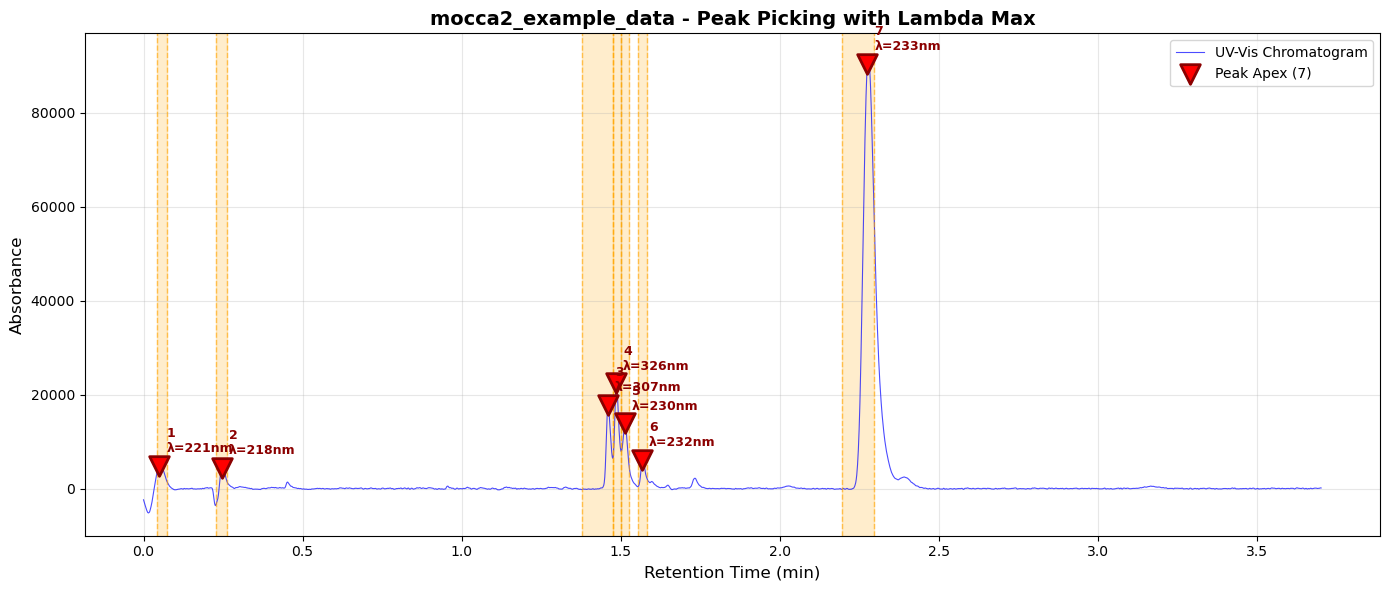

In [10]:
lcmsuv_man.plot_uvvis_with_peaks(show=True)


### Step 5: Plot MS Spectrum from LCMSUVMeasMan

You can also plot MS spectra using the LCMSUVMeasMan, which uses the underlying MS data from E2.mzML.


Plotting MS spectrum at RT = 0.050 min


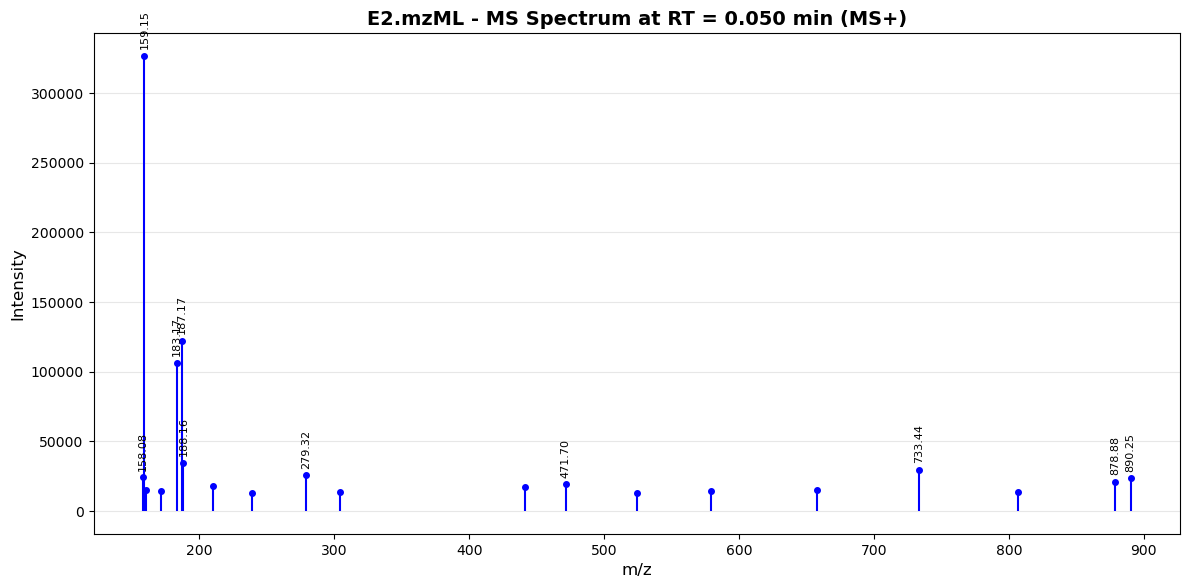

In [11]:
if len(uvvis_apex_times) > 0:
    target_rt = uvvis_apex_times[0]
    print(f"Plotting MS spectrum at RT = {target_rt:.3f} min")
    lcmsuv_man.plot_ms_spectrum(target_rt, tolerance=30.0, top_n=20, show=True)


### Step 6: Extract Peak Region and Average Spectrum

Following the mocca2 example pattern, extract a peak region and calculate the average absorption spectrum over that region. This is useful for obtaining a representative spectrum when a peak has some variation.


Extracting peak region: 0.042 - 0.073 min


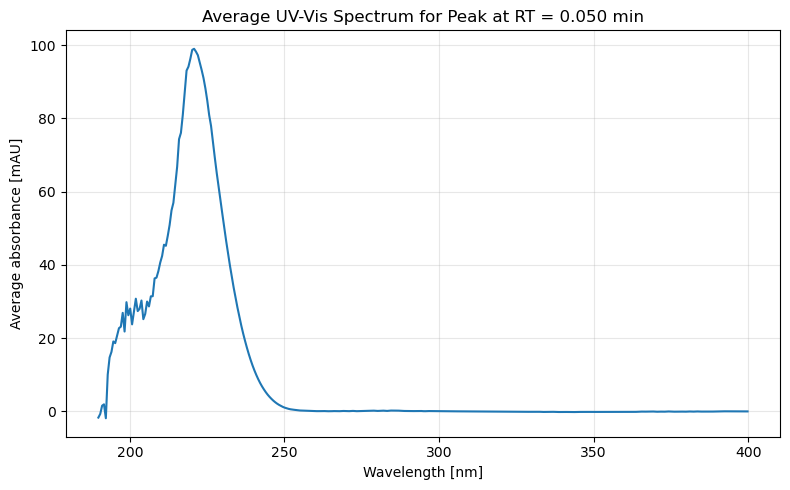


Average spectrum calculated over 39 time points
Wavelength range: 190 - 400 nm


In [12]:
import numpy as np

if len(uvvis_apex_times) > 0:
    # extract region around first peak
    target_peak_rt = uvvis_apex_times[0]
    peak_info = lcmsuv_man.get_peak(target_peak_rt)
    
    # extract region with peak (using boundaries)
    start_rt = peak_info['start_rt']
    end_rt = peak_info['end_rt']
    
    print(f"Extracting peak region: {start_rt:.3f} - {end_rt:.3f} min")
    peak_region = lcmsuv_man.chromatogram.extract_time(start_rt, end_rt)
    
    # average spectrum over the peak region
    avg_spectrum = np.mean(peak_region.data, axis=1)
    
    # plot spectrum
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(peak_region.wavelength, avg_spectrum)
    ax.set_xlabel("Wavelength [nm]")
    ax.set_ylabel("Average absorbance [mAU]")
    ax.set_title(f"Average UV-Vis Spectrum for Peak at RT = {target_peak_rt:.3f} min")
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nAverage spectrum calculated over {len(peak_region.time)} time points")
    print(f"Wavelength range: {peak_region.wavelength[0]:.0f} - {peak_region.wavelength[-1]:.0f} nm")
